# Classification models based on data about pets

## Libraries and settings

In [1]:
# Libraries
import os
import random
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/WTYK/LC_09


## Simulate pet data

In [2]:
# Set a seed for reproducibility
random.seed(42)

# Function to generate pets
def pets(pet_type, weight_min, weight_max, height_min, height_max, n_animals=1000):

    pets = pd.DataFrame({
            'age': [random.randint(1, 15) for _ in range(n_animals)],
            'color': [random.choice(['red', 'blue', 'green', 'yellow']) for _ in range(n_animals)],
            'weight': [random.uniform(weight_min, weight_max) for _ in range(n_animals)],
            'height': [random.uniform(height_min, height_max) for _ in range(n_animals)],
            'eats_meat': [random.choice(['yes', 'no']) for _ in range(n_animals)],
            'pets': [pet_type for _ in range(n_animals)]})

    return pets

# Simulate data about dogs, cats, birds, and fishes
dogs = pets('dog', weight_min=5, weight_max=80, height_min=20, height_max=90)
cats = pets('cat', weight_min=2, weight_max=8, height_min=20, height_max=40)
birds = pets('bird', weight_min=0.2, weight_max=7, height_min=10, height_max=80)
fishes = pets('fish', weight_min=0.1, weight_max=30, height_min=10, height_max=30)

# Concatenate all animal data to create a single dataframe
df_orig = pd.concat([dogs, cats, birds, fishes])

# Shuffle the data
df_orig = df_orig.sample(frac=1, random_state=42).reset_index(drop=True)

# Show the first few rows
df_orig.head()

,age,color,weight,height,eats_meat,pets
0,8,red,19.714384,59.985395,no,dog
1,10,red,18.482795,21.060650,no,fish
2,12,blue,61.574806,45.971437,yes,dog
3,1,red,24.117160,26.484956,yes,fish
4,11,green,0.310169,58.297460,yes,bird


## Convert categorical features to numerical using one-hot encoding

In [11]:
# Convert categorical feature to numerical using one-hot encoding (exclude column 'pets')
df_encoded = pd.get_dummies(df_orig, columns=['color', 'eats_meat'])


### Create train and test samples (train = 80%, test = 20% of the data)

In [12]:
# Create train and test samples
X = df_encoded.drop('pets', axis=1)
y = df_encoded['pets']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show X_train
X_train.head()

# Show y_train
y_train.head()


3994     cat
423     bird
2991     dog
1221     cat
506     fish
Name: pets, dtype: object

## Fit a classification tree

In [13]:
# Create decision tree regressor object with max_depth = 3
clf = DecisionTreeClassifier(max_depth=3)

# Train decision tree regressor
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


## Use cross-validation to evaluate the model performance

In [14]:
# Cross-validation (5-fold) with X_test and y_test, cv=5 and scoring='accuracy'


# Result
scores = cross_val_score(clf, X_test, y_test, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.85    0.8375  0.84375 0.83125 0.83125]
Mean accuracy: 0.8387499999999999


## Plot the classification tree

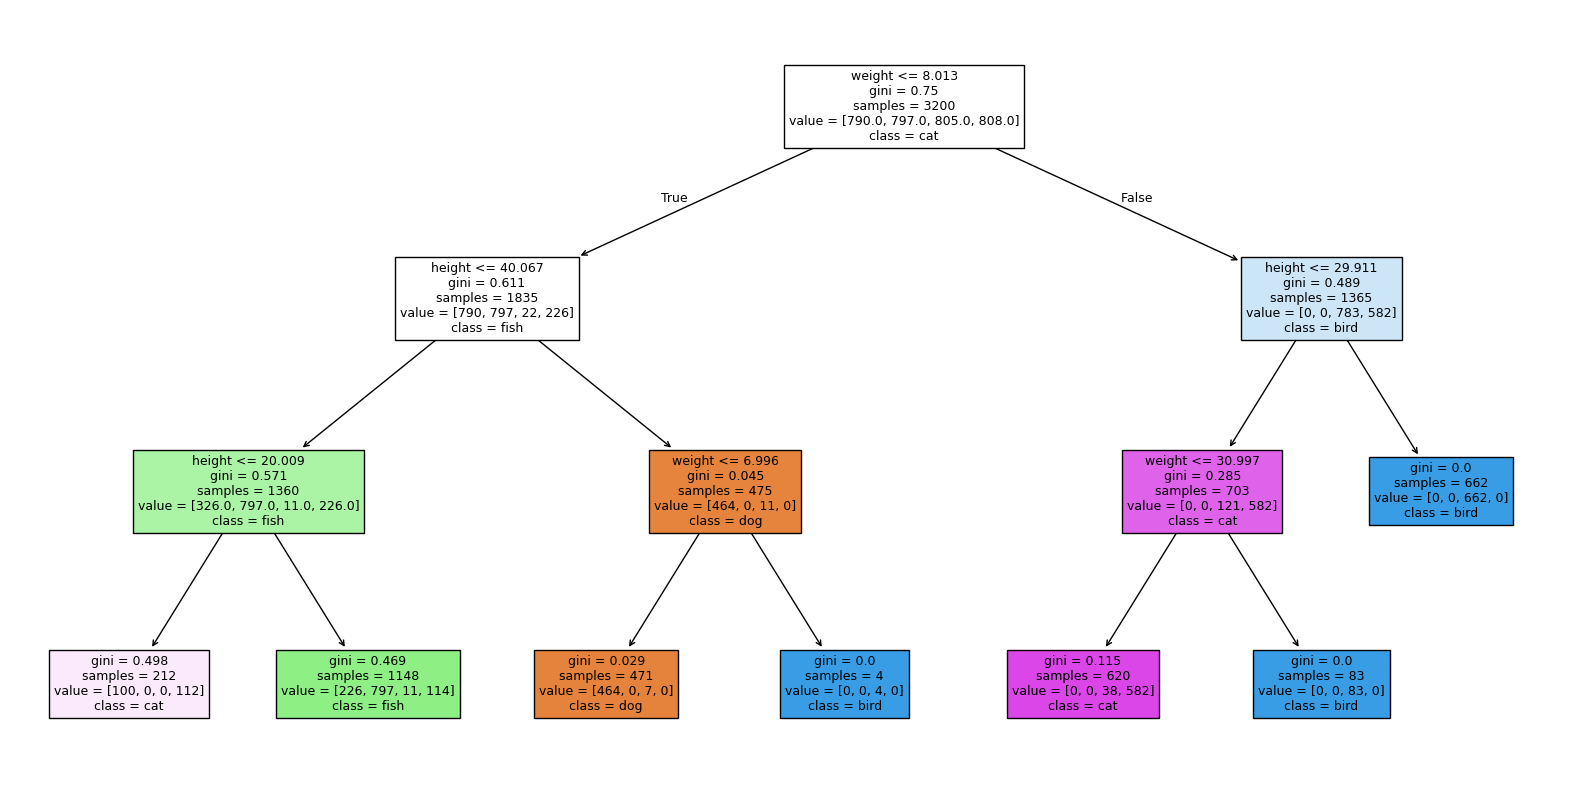

In [15]:
# Get unique class names from df_orig['pets']


# For the meaning of numbers in each box, look at the root node


# Plot the 
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=df_orig['pets'].unique(), filled=True)
plt.show()

## Fit the Random Forest Classifier

In [16]:
# Create a random forest Classifier (by convention, clf means 'classifier')
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf_rf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

# Calculate accuracy
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)


Random Forest Classifier Accuracy: 0.8575


## Show feature importance

age: 0.057298957590357996
weight: 0.5063499549827803
height: 0.40786291650675777
color_blue: 0.005111335442212982
color_green: 0.0046641472052697235
color_red: 0.004947630616527315
color_yellow: 0.0046457176762162225
eats_meat_no: 0.004540596569432988
eats_meat_yes: 0.004578743410444723


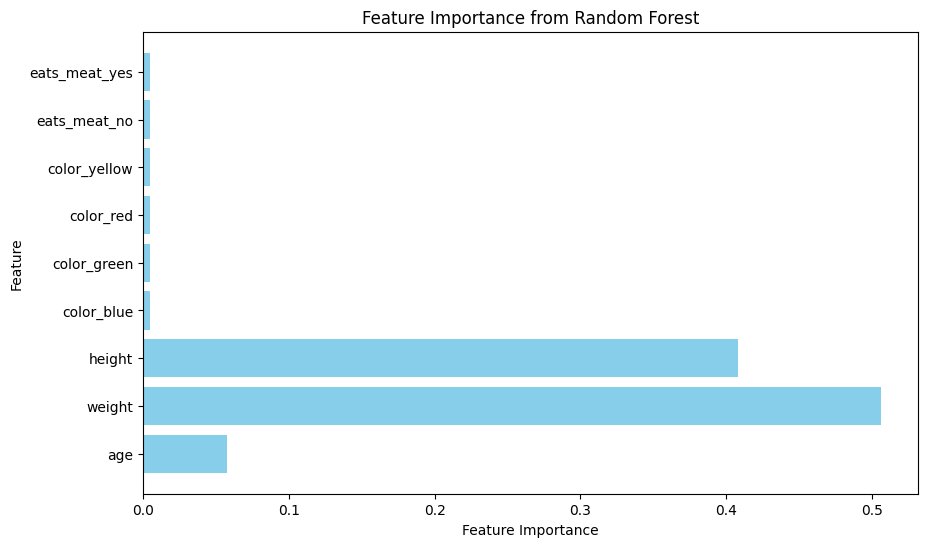

In [17]:
# Get colnames from X_train
colnames = X_train.columns

# Derive feature importance from random forest
importances = clf_rf.feature_importances_

# Print col-names and importances-values
for col, imp in zip(colnames, importances):
    print(f'{col}: {imp}')

# Barplot with feature importance
plt.figure(figsize=(10, 6))
plt.barh(colnames, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [10]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-13 10:18:39
Python Version: 3.11.10
-----------------------------------
